[[-9.81]
 [ 0.  ]
 [ 0.  ]]
[[-9.76099086137743]
 [0]
 [0.979365817305384]]
[[-9.61445312862258]
 [0]
 [1.94894613509955]]
[[-9.37185095832219]
 [0]
 [2.89905322734774]]
[[-9.03560835116830]
 [0]
 [3.82019393804786]]
[[-8.60908493214455]
 [0]
 [4.70316453370723]]
[[-8.09654238226394]
 [0]
 [5.53914266400530]]
[[-7.50310185726083]
 [0]
 [6.31977551180175]]
[[-6.83469281869569]
 [0]
 [7.03726325172432]]
[[-6.09799378873521]
 [0]
 [7.68443698344561]]
[[-5.30036562056645]
 [0]
 [8.25483036096546]]
[[-4.44977795118491]
 [0]
 [8.74274420220268]]
[[-3.55472957141616]
 [0]
 [9.14330343333849]]
[[-2.62416350880720]
 [0]
 [9.45250579894266]]
[[-1.66737767185136]
 [0]
 [9.66726185118679]]
[[-0.693931948360163]
 [0]
 [9.78542581858577]]
[[0.286447313775644]
 [0]
 [9.80581704583716]]
[[1.26396448903910]
 [0]
 [9.72823179053871]]
[[2.22885254893918]
 [0]
 [9.55344525891509]]
[[3.17147065093097]
 [0]
 [9.28320386021353]]
[[4.08240046652747]
 [0]
 [8.92020775715993]]
[[4.95254028612460]
 [0]
 [8.46808

/tmp/ipykernel_3801/54387556.py:81: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vel_arr.append(float(vel[0]))
/tmp/ipykernel_3801/54387556.py:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alt_arr.append(float(alt[0]))


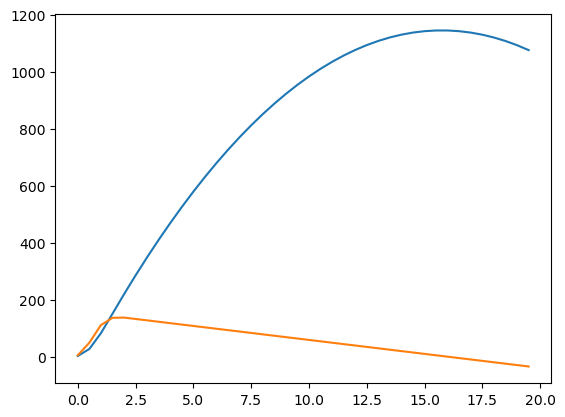

In [16]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

def W_from_L(results):
    # results - vector 1x3
    J = np.matrix('1 0 0; 0 1 0; 0 0 1')
    J_det = np.linalg.det(J)
    #create matrixes for angle velocities
    w_x_m = np.matrix(J)
    w_y_m = np.matrix(J)
    w_z_m = np.matrix(J)
    w_x_m[:, 0] = results
    w_y_m[:, 1] = results
    w_z_m[:, 2] = results
    w_x = np.linalg.det(w_x_m) / J_det
    w_y = np.linalg.det(w_y_m) / J_det
    w_z = np.linalg.det(w_z_m) / J_det
    #print(np.dot(J, np.array([w_x, w_y, w_z])))
    return np.matrix([[w_x], [w_y], [w_z]])


def Engine_Acceleration(time):
    #force = np.matrix('0.0; 0.0; 0.0');
    force = np.matrix([[0.0], [0.0], [0.0]])
    if time > 2:
        pass
    elif time < 0.2:
        force[0] = 44
    elif time < 0.3:
        force[0] = 186
    elif time < 0.4:
        force[0] = 243
    elif time < 0.6:
        force[0] = 250
    elif time < 0.8:
        force[0] = 211
    elif time < 1.0:
        force[0] = 180
    elif time < 1.2:
        force[0] = 150
    elif time < 1.4:
        force[0] = 103
    elif time < 1.6:
        force[0] = 34
    elif time < 1.8:
        force[0] = 5
    force /= 1.5 #mass of the rocket, should be time function
    return force


time_arr = []
vel_arr = []
alt_arr = []

acc = np.array([[0.0], [0.0], [0.0]])
vel = np.matrix([[0.0], [0.0], [0.0]])
alt = np.matrix([[0.0], [0.0], [0.0]])
force_moments = np.matrix([[0.0], [0.0], [0.0]])
w = np.array([[0.0], [0.0], [0.0]])
#angles relatively of earth
angles_RoE = np.array([[0.0], [0.0], [0.0]])
A_RoE = np.matrix([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])

delta_t = 0.5
for i in range(int(20/delta_t)):
    #temporary flight time
    time = i * delta_t
    time_arr.append(time)
    #acceleration calculations
    pre_acc = np.matrix(acc)
    acc = np.matrix([[0.0], [0.0], [0.0]])
    acc += Engine_Acceleration(time)
    #acc += np.matrix([[-9.81], [0.0], [0.0]])
    acc += np.dot(A_RoE, np.matrix([[-9.81], [0.0], [0.0]]))
    print(np.dot(A_RoE, np.matrix([[-9.81], [0.0], [0.0]])))
    
    #linear velocity calculations
    pre_vel = vel
    vel += (acc+pre_acc) * 0.5 * delta_t
    vel_arr.append(float(vel[0]))
    #altitude calculations
    alt += (vel+pre_vel) * 0.5 * delta_t
    alt_arr.append(float(alt[0]))
    #force moments calculations
    pre_force_moments = force_moments
    force_moments = np.matrix([[0.0], [0.0], [0.0]])
    #rotation moments calculations
    rotation_moments = (force_moments+pre_force_moments) * 0.5 * delta_t
    #angle velocity calculation
    pre_w = w
    w = W_from_L(rotation_moments)
    #angles relatively of earth calculations
    angles_RoE += (w+pre_w) * delta_t
    #print(angles_RoE)
    alpha = angles_RoE[0][0]
    beta = 0.1#angles_RoE[1][0]
    gamma = angles_RoE[2][0]
    A = np.matrix([[cos(beta)*cos(gamma), -sin(gamma)*cos(beta), sin(beta)],
                   [sin(alpha)*sin(beta)*cos(gamma)+sin(gamma)*cos(alpha), -sin(alpha)*sin(beta)*sin(gamma)+cos(alpha)*cos(gamma), -sin(alpha)*cos(beta)],
                   [sin(alpha)*sin(gamma)-sin(beta)*cos(alpha)*cos(gamma), sin(alpha)*cos(gamma)+sin(beta)*sin(gamma)*cos(alpha), cos(alpha)*cos(beta)]])
    A_RoE = np.dot(A_RoE, A)
    #print(A_RoE)
    



plt.plot(time_arr, alt_arr)
plt.plot(time_arr, vel_arr)

plt.show()
    

#print(W_from_L(np.matrix('1; 43; 1')))
#print(Engine_Acceleration(1))